<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Apriori_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


In [0]:
warnings.filterwarnings("ignore")

In [3]:
bakery=pd.read_csv("https://raw.githubusercontent.com/02asmita/Term-4/patch-1/Data/Assignment/BreadBasket_DMS.csv")
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [4]:
bakery["Item"]=bakery["Item"].str.lower()
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam


In [6]:
len(bakery["Item"].unique())

95

In [0]:
import seaborn as sns

In [12]:
bakery["Item"].value_counts().head()

coffee    5471
bread     3325
tea       1435
cake      1025
pastry     856
Name: Item, dtype: int64

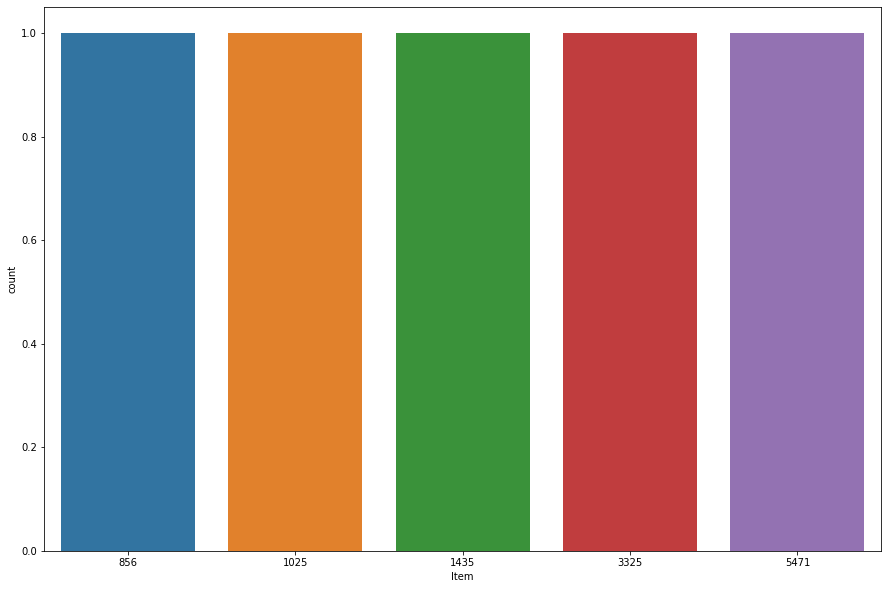

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x=bakery["Item"].value_counts().head(),data=bakery)

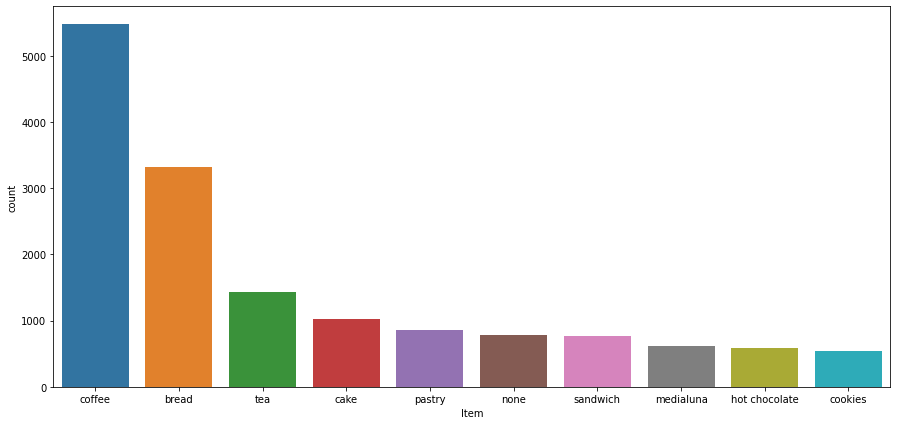

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x="Item",data=bakery,order=bakery["Item"].value_counts().iloc[:10].index)

In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [0]:
hot_encoded_bakery=bakery.groupby(["Transaction","Item"])["Item"].count().unstack().reset_index().fillna(0).set_index("Transaction")

In [35]:
hot_encoded_bakery.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,...,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,none,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1


In [0]:
hot_encoded_bakery=hot_encoded_bakery.applymap(encode_units)

In [38]:
hot_encoded_bakery.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,...,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,none,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
frequent_itemsets  =  apriori(hot_encoded_bakery, min_support = 0.01, use_colnames = True)

In [41]:
frequent_itemsets.head()

,support,itemsets
0,0.036093,(alfajores)
1,0.015948,(baguette)
2,0.324940,(bread)
3,0.039765,(brownie)
4,0.103137,(cake)


In [42]:
rules  =  association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(bread),0.036093,0.324940,0.010282,0.284884,0.876728,-0.001446,0.943987
1,(alfajores),(coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(brownie),(bread),0.039765,0.324940,0.010702,0.269129,0.828244,-0.002219,0.923639
3,(cake),(bread),0.103137,0.324940,0.023187,0.224822,0.691888,-0.010326,0.870846
4,(bread),(coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131


In [44]:
rules.sort_values("lift",ascending=False,inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(none),(tea),0.079005,0.141643,0.018256,0.231076,1.631394,0.007066,1.116309
13,(cake),(tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146
26,(toast),(coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
28,(sandwich),(tea),0.071346,0.141643,0.014269,0.200000,1.412000,0.004164,1.072946
24,(spanish brunch),(coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493


To explain how to draw inference explore the first rule we can see that toast and coffee are commonly bought together. This makes sense since people who purchase toast would like to have coffee with it.

The support value for the this rule is 0.023666. This number is calculated by dividing the number of transactions containing toast divided by total number of transactions.
The confidence level for the rule is 0.704403 which shows that out of all the transactions that contain toast , 70.44% of the transactions also contain coffee.
Finally, the lift of 1.47 tells us that coffee is 1.47 times more likely to be bought by the customers who buy toast compared to the default likelihood of the sale of coffee.

In [0]:
rules=rules[(rules["confidence"])>0.55]

In [0]:
rules=rules.sort_values("confidence",ascending=True)

In [50]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,pastry,coffee,0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
17,medialuna,coffee,0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
24,spanish brunch,coffee,0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
26,toast,coffee,0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789


How do we interpret these rules?

55% of the customers who bought a pastry also bought a coffee.

60% of the customers who bought a spanish brunch also bought a coffee.

70% of the customers who bought a toast also bought a coffee.

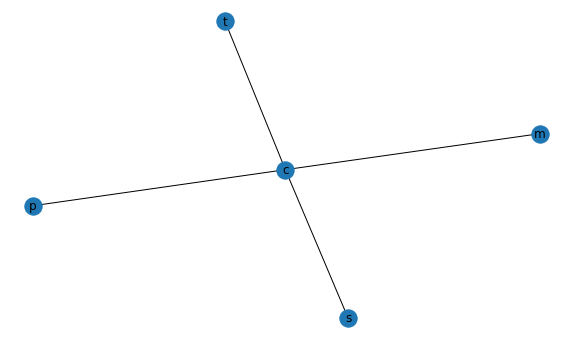

In [51]:
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

Conclusion

Coffee is the bestseller of this bakery and it shows association with 4 items- pastry, toast, medialuna and spanish brunch. There are a couple of strategies that the bakery can adopt to increase its sales considering the association we have seen between coffee and its 4 partners.